# Hierarchical Risk Parity

HRP is a modern portfolio optimization method inspired by machine learning.

The idea is that by examining the hierarchical structure of the market, we can better diversify. 

In this cookbook recipe, we will cover:

- Downloading data for HRP
- Using HRP to find the minimum variance portfolio
- Plotting dendrograms

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/robertmartin8/PyPortfolioOpt/blob/master/cookbook/5-Hierarchical-Risk-Parity.ipynb)
    
[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/robertmartin8/PyPortfolioOpt/blob/master/cookbook/5-Hierarchical-Risk-Parity.ipynb)
    
[![Gradient](https://assets.paperspace.io/img/gradient-badge.svg)](https://console.paperspace.com/github/robertmartin8/PyPortfolioOpt/blob/master/cookbook/5-Hierarchical-Risk-Parity.ipynb)
    
[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/robertmartin8/PyPortfolioOpt/blob/master/cookbook/5-Hierarchical-Risk-Parity.ipynb)


## Downloading data

HRP only requires historical returns

In [1]:
!pip install pandas numpy matplotlib yfinance PyPortfolioOpt
import os
if not os.path.isdir('data'):
    os.system('git clone https://github.com/robertmartin8/PyPortfolioOpt.git')
    os.chdir('PyPortfolioOpt/cookbook')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pypfopt

pypfopt.__version__

'1.5.6'

In [3]:
tickers = ["BLK", "BAC", "AAPL", "TM", "WMT",
           "JD", "INTU", "MA", "UL", "CVS",
           "DIS", "AMD", "NVDA", "PBI", "TGT"]

ohlc = yf.download(tickers, period="max")
prices = ohlc["Adj Close"]
prices.tail()

[*********************100%***********************]  15 of 15 completed


Ticker,AAPL,AMD,BAC,BLK,CVS,DIS,INTU,JD,MA,NVDA,PBI,TGT,TM,UL,WMT
Date,,,,,,,,,,,,,,,
2024-11-22,229.869995,138.350006,47.000000,1036.459961,58.009998,115.650002,640.119995,34.680000,520.859985,141.949997,8.05,125.010002,174.399994,58.610001,90.440002
2024-11-25,232.869995,141.130005,47.500000,1031.489990,60.080002,116.000000,634.619995,34.509998,526.599976,136.020004,8.16,130.529999,175.830002,58.779999,89.500000
2024-11-26,235.059998,137.720001,47.750000,1026.479980,59.009998,115.449997,638.830017,35.330002,528.479980,136.919998,8.20,126.550003,172.520004,59.099998,91.309998
2024-11-27,234.929993,136.240005,47.770000,1019.450012,59.959999,117.599998,636.169983,37.189999,532.380005,135.339996,8.14,130.089996,169.720001,59.740002,91.879997
2024-11-29,237.330002,137.179993,47.509998,1022.799988,59.849998,117.470001,641.729980,37.380001,532.940002,138.250000,8.06,132.309998,170.630005,59.840000,92.500000


In [4]:
from pypfopt import expected_returns

rets = expected_returns.returns_from_prices(prices)
rets.tail()

Ticker,AAPL,AMD,BAC,BLK,CVS,DIS,INTU,JD,MA,NVDA,PBI,TGT,TM,UL,WMT
Date,,,,,,,,,,,,,,,
2024-11-22,0.005908,0.006255,0.011623,0.008230,0.015937,0.008107,-0.056844,-0.019785,0.011182,-0.032181,0.046814,0.028127,0.005883,0.017005,0.023193
2024-11-25,0.013051,0.020094,0.010638,-0.004795,0.035684,0.003026,-0.008592,-0.004902,0.011020,-0.041775,0.013665,0.044156,0.008200,0.002900,-0.010394
2024-11-26,0.009404,-0.024162,0.005263,-0.004857,-0.017810,-0.004741,0.006634,0.023761,0.003570,0.006617,0.004902,-0.030491,-0.018825,0.005444,0.020223
2024-11-27,-0.000553,-0.010746,0.000419,-0.006849,0.016099,0.018623,-0.004164,0.052646,0.007380,-0.011540,-0.007317,0.027973,-0.016230,0.010829,0.006242
2024-11-29,0.010216,0.006899,-0.005443,0.003286,-0.001835,-0.001105,0.008740,0.005109,0.001052,0.021501,-0.009828,0.017065,0.005362,0.001674,0.006748


## HRP optimization

HRP uses a completely different backend, so it is currently not possible to pass constraints or specify an objective function.

In [5]:
from pypfopt import HRPOpt

In [6]:
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('AAPL', 0.03543),
             ('AMD', 0.01748),
             ('BAC', 0.0462),
             ('BLK', 0.05103),
             ('CVS', 0.11493),
             ('DIS', 0.06638),
             ('INTU', 0.03285),
             ('JD', 0.04617),
             ('MA', 0.05374),
             ('NVDA', 0.01695),
             ('PBI', 0.07773),
             ('TGT', 0.07838),
             ('TM', 0.11072),
             ('UL', 0.156),
             ('WMT', 0.09599)])

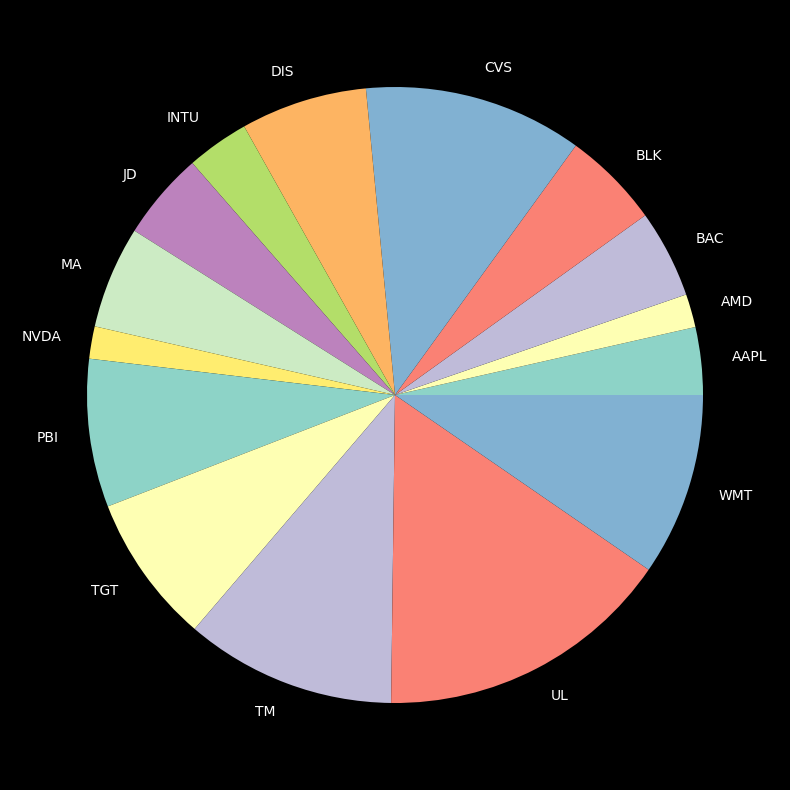

In [7]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [8]:
hrp.portfolio_performance(verbose=True);

Expected annual return: 18.7%
Annual volatility: 18.9%
Sharpe Ratio: 0.99


## Plotting

It is very simple to plot a dendrogram (tree diagram) based on the hierarchical structure of asset returns

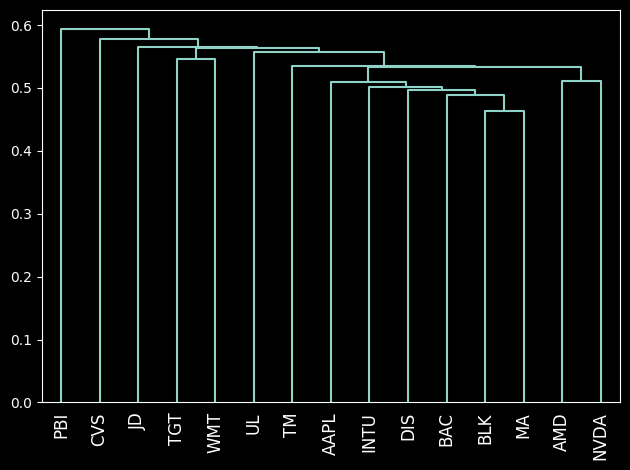

In [9]:
from pypfopt import plotting

plotting.plot_dendrogram(hrp); 

If you look at this dendogram closely, you can see that most of the clusters make a lot of sense. For example, AMD and NVDA (both semiconductor manufacturers) are grouped.